In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)

2. Работа с табличными данными в <a href='http://pandas.pydata.org/pandas-docs/stable/'>Pandas</a>
----------
Pandas может представлять массивы NumPy с метками для строк и столбцов. Начнем с примера.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Ответим на некоторые вопросы о представленном наборе данных.

**Посмотрим на распределение возраста пассажиров Титаника**

<AxesSubplot:>

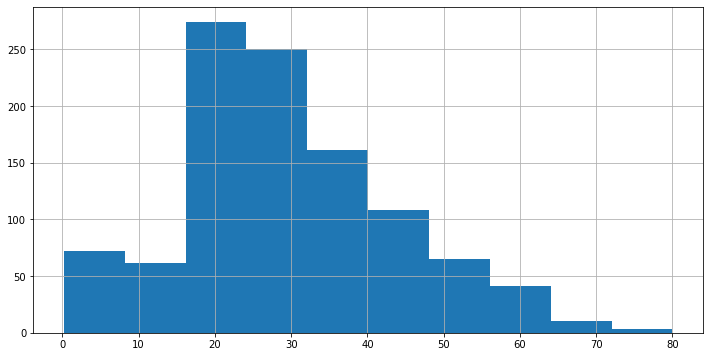

In [5]:
df['age'].hist()

**Скольким мужчинам / женщинам удалось выжить?**

In [6]:
pd.crosstab(df['sex'], df['survived'])

survived,0,1
sex,,
female,127,339
male,682,161


In [7]:
pd.crosstab(df['sex'], df['survived'], normalize=0)

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


**А каковы доли выживших в различных ценовых классах?**

In [8]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

<AxesSubplot:xlabel='pclass'>

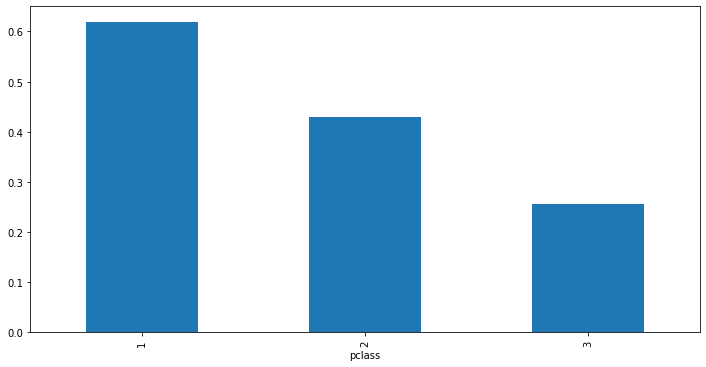

In [9]:
df.groupby('pclass')['survived'].mean().plot(kind='bar')

## 2.1. Структуры данных в Pandas

### 2.1.1. DataFrame

`DataFrame` - представление данных в виде таблицы. Основными атрибутами являются `index` и `columns`.

In [10]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
df.values

array([[1, 1, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, 1, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, 0, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, 0, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, 0, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, 0, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

Для предварительного анализа пригодятся встроенные функции:

In [13]:
df.shape

(1309, 14)

In [14]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


`DataFrame` можно создать с помощью словаря Python.

In [16]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


<p><a name="series"></a></p>
### 2.1.2. Series

`Series` служит для представления одномерных данных. Проще говоря, это столбец `DataFrame`.

In [17]:
df['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [18]:
df.pclass

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

Основными атрибутами `Series` являются `index` и `values`.

In [19]:
df['pclass'].index

RangeIndex(start=0, stop=1309, step=1)

In [20]:
df['pclass'].values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
df['pclass'][1]

1

К `Series` можно применять различные операции.

In [22]:
df['age'] * 10

0       290.000
1         9.167
2        20.000
3       300.000
4       250.000
         ...   
1304    145.000
1305        NaN
1306    265.000
1307    270.000
1308    290.000
Name: age, Length: 1309, dtype: float64

In [23]:
df['fare'].mean()

33.29547928134572

In [24]:
df['name'].apply(lambda x: x.split(',')[1])

0                        Miss. Elisabeth Walton
1                         Master. Hudson Trevor
2                           Miss. Helen Loraine
3                   Mr. Hudson Joshua Creighton
4        Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                   
1304                               Miss. Hileni
1305                              Miss. Thamine
1306                            Mr. Mapriededer
1307                                  Mr. Ortin
1308                                    Mr. Leo
Name: name, Length: 1309, dtype: object

In [25]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [26]:
df['surname'] = df['name'].apply(lambda x: x.split(',')[0])

In [27]:
q = df['fare'].quantile(0.75)
q

31.275

In [28]:
def expensive_ticket(fare):
    return 'Expensive' if (fare > q) else 'Cheap'

In [29]:
df['fare'].apply(expensive_ticket)

0       Expensive
1       Expensive
2       Expensive
3       Expensive
4       Expensive
          ...    
1304        Cheap
1305        Cheap
1306        Cheap
1307        Cheap
1308        Cheap
Name: fare, Length: 1309, dtype: object

**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [60]:
df['ticket'].max()

'WE/P 5735'

In [61]:
df['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

In [66]:
import re

In [67]:
df['ticket'] = df['ticket'].apply(lambda x: re.sub(r'\D', '', str(x))) #уберем буквы в наших строках

In [68]:
df['ticket'].unique()

array(['241600', '1137810', '199520', '135020', '1120500', '117690',
       '198770', '270420', '118130', '130500', '117510', '1113690',
       '139050', '119670', '1105640', '1137840', '1122770', '369280',
       '1137830', '1104890', '1135050', '1114270', '1130540', '1123790',
       '169660', '1130500', '1137980', '6950', '1130590', '1137600',
       '199240', '177700', '1138060', '1101520', '1120510', '135080',
       '1104650', '57270', '117700', '1137910', '1129010', '1130550',
       '1138040', '174740', '336380', '117550', '117670', '369470',
       '174210', '1130510', '199500', '1137780', '177650', '135680',
       '135670', '1120580', '1138030', '1113200', '1135030', '1123780',
       '174530', '1137800', '1120530', '117650', '1137960', '369730',
       '1120590', '169880', '127490', '1130380', '174630', '6800',
       '1113610', '1137890', '1114260', '199430', '1135720', '6940',
       '1130440', '117710', '174640', '117530', '1130280', '174650',
       '174750', '1123770',

In [72]:
df['ticket'] = pd.to_numeric(df['ticket'], errors='coerce')

In [73]:
a = df['ticket'].max()
print('Максимальная цена за билет = ', a)

Максимальная цена за билет =  31012980


In [74]:
a = df['ticket'].median()
print('Медианная цена за билет = ', a)

Медианная цена за билет =  2346040.0


In [76]:
b = df['survived'].mean()
print('Доля выживших = ', b)

Доля выживших =  0.3793103448275862


In [79]:
pd.crosstab(df['sex'], df['sex'].count)

col_0,"<bound method Series.count of 0 female\n1 male\n2 female\n3 male\n4 female\n ... \n1304 female\n1305 female\n1306 male\n1307 male\n1308 male\nName: sex, Length: 957, dtype: object>"
sex,
female,342
male,615


На борту находилось 342 женщины и 615 мужчин

**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

In [81]:
# Распределение переменной Pclass для мужчин
male_pclass = df[df['sex'] == 'male']['pclass'].value_counts()

# Распределение переменной Pclass для женщин
female_pclass = df[df['sex'] == 'female']['pclass'].value_counts()

print("Распределение pclass для мужчин:")
print(male_pclass)

print("\nРаспределение pclass для женщин:")
print(female_pclass)

Распределение pclass для мужчин:
3    371
1    129
2    115
Name: pclass, dtype: int64

Распределение pclass для женщин:
3    178
1     95
2     69
Name: pclass, dtype: int64


В первом классе было 129 мужчин.
В третьем классе было 178 женщин

In [114]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, float('inf')], labels=[1, 2, 3], right=False)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first name,last name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,241600,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabeth,Elisabeth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,1137810,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson,Hudson
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,1137810,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Helen,Helen
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,1137810,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudson,Hudson
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,1137810,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson,Hudson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,26650,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Hileni,Hileni
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,26650,14.4542,NaN,C,NaN,NaN,NaN,Zabour,NaN,Thamine,Thamine
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,26560,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mapriededer,Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,26700,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Ortin,Ortin


**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.

In [136]:
# Извлечение имен из полного имени
df['first name'] = df['name'].str.split().str[2]
mode_male_name = df[df['name'].str.contains('Mr.')]['first name'].mode().iloc[0]
mode_female_name = df[df['name'].str.contains('Miss.|Mrs.')]['first name'].mode().iloc[0]

In [137]:
print('Самое популярное мужское имя среди пассажиров - ', mode_male_name)
print('Самое популярное женское имя среди пассажиров - ', mode_female_name)

Самое популярное мужское имя среди пассажиров -  William
Самое популярное женское имя среди пассажиров -  William


## 2.2. Извлечение данных

In [30]:
df[['sex', 'age']]

,sex,age
0,female,29.0000
1,male,0.9167
2,female,2.0000
3,male,30.0000
4,female,25.0000
...,...,...
1304,female,14.5000
1305,female,NaN
1306,male,26.5000
1307,male,27.0000


In [31]:
df[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth


### 2.2.1. Индексация с помощью `loc` и `iloc`

In [32]:
df.iloc[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth


In [33]:
df.iloc[5:15, 4]

5     48.0
6     63.0
7     39.0
8     53.0
9     71.0
10    47.0
11    18.0
12    24.0
13    26.0
14    80.0
Name: age, dtype: float64

In [34]:
df.loc[5:15, 'sex']

5       male
6     female
7       male
8     female
9       male
10      male
11    female
12    female
13    female
14      male
15      male
Name: sex, dtype: object

### 2.2.2. Булева индексация

Соответствует конструкции WHERE clause в SQL.

In [35]:
df['age'] > 30

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [36]:
df[df['fare'] > 50] # boolean mask

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage


In [37]:
df[(df['sex'] == 'male') & (df['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith
22,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,3,1,"Tenglin, Mr. Gunnar Isidor",male,25.0000,0,0,350033,7.7958,NaN,S,13 15,NaN,NaN,Tenglin
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Thomas
1254,3,1,"Tornquist, Mr. William Henry",male,25.0000,0,0,LINE,0.0000,NaN,S,15,NaN,NaN,Tornquist
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Touma


**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [119]:
# Пассажиры, севшие в Cherbourg (Embarked='C') и старше 50 лет
passengers_over_50_from_cherbourg = df[(df['embarked'] == 'C') & (df['age'] > 50)]

# Женщины младше 20 и старше 50 лет
women_between_20_and_50 = df[(df['sex'] == 'female') & ((df['age'] < 20) | (df['age'] > 50))]

# Пассажиры старше 70 лет
passengers_over_70 = df[df['age'] > 70]


In [120]:
print("Данные о пассажирах, севших в Cherbourg и старше 50 лет:")
print(passengers_over_50_from_cherbourg)

print("Данные о женщинах младше 20 и старше 50 лет:")
print(women_between_20_and_50)

print("Количество пассажиров старше 70 лет на борту:", len(passengers_over_70))

Данные о пассажирах, севших в Cherbourg и старше 50 лет:
     pclass  survived                                              name  \
43        1         1   Bucknell, Mrs. William Robert (Emma Eliza Ward)   
104       1         1                    Eustis, Miss. Elizabeth Mussey   
123       1         1                  Frolicher-Stehli, Mr. Maxmillian   
136       1         1                         Gracie, Col. Archibald IV   
174       1         0                           Kent, Mr. Edward Austin   
186       1         1         Lindstrom, Mrs. Carl Johan (Sigrid Posse)   
215       1         0                        Newell, Mr. Arthur Webster   
221       1         0                    Ostby, Mr. Engelhart Cornelius   
233       1         1     Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
264       1         1               Simonius-Blumer, Col. Oberst Alfons   
267       1         0                           Smith, Mr. James Clinch   
280       1         1                   Ste

## 2.3. Добавление и удаление объектов

Для добавления новых объектов можно воспользоваться методом `append` или функцией `pd.concat`.

In [38]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [39]:
df1

,A,B
0,1,2
1,3,4


In [40]:
df1.append(df2)

C:\Users\София\AppData\Local\Temp\ipykernel_17756\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [41]:
df1.append(df2, ignore_index=True)

C:\Users\София\AppData\Local\Temp\ipykernel_17756\2149412069.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True)


,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [42]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


Метод `drop` позволяет удалять строки и столбцы таблицы.

In [43]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison


In [44]:
df.drop(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian


In [45]:
df.drop(['pclass'], axis=1)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour
1305,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour
1306,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian
1307,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian


## 2.4. Заполнение пропусков в данных

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
 14  surname    1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [47]:
df[15:23]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",Baumann
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",Baxter
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",Baxter
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN,Bazzani
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",Beattie
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith
22,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr


In [48]:
df['age'].fillna(df['age'].median())[15:23]

15    28.0
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

In [49]:
df['age'][15:23].fillna(method='ffill')

15     NaN
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

In [50]:
df['age'][15:23].fillna(method='bfill')

15    24.0
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

## 2.5. Группировка данных

In [51]:
df['survived'].sum()

500

А если мы хотим посчитать статистики в каждом ценовом классе?

In [52]:
for p in ['C', 'S', 'Q']:
    print(p, df[df['embarked'] == p]['survived'].sum())

C 150
S 304
Q 44


<p>Мы хотим применить одну и ту же функцию `sum()` к столбцу `Survived` на подмножествах данных, сгруппированных по ключу `Pclass`.</p>
<p>Это легко сделать с помощью функции `groupby`. Данная операция состоит из трех шагов и иногда ее называют **"split-apply-combine"**. Аналогична конструкции GROUP BY в SQL.</p>

<ul>
    <li>**Split**: данные делятся на группы по заданному критерию</li>
    <li>**Apply**: к каждой группе применяется необходимая операция</li>
    <li>**Combine**: результат собирается в таблицу</li>
</ul>

In [53]:
df_sample = df.sample(9, random_state=1013)
df_sample

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
537,2,0,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S,NaN,NaN,"Denmark / New York, NY",Ponesell
909,3,1,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S,15,NaN,NaN,Jussila
187,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,9,NaN,"Paris, France",Lines
902,3,0,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,Johnston
1095,3,0,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,NaN,NaN,O'Sullivan
213,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA",Newell
184,1,0,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,NaN,NaN,"Chicago, IL",Lewy
999,3,1,"McCarthy, Miss. Catherine ""Katie""",female,NaN,0,0,383123,7.7500,NaN,Q,15 16,NaN,NaN,McCarthy
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith


In [54]:
df_sample.groupby('embarked')['survived'].sum()

embarked
C    1
Q    1
S    3
Name: survived, dtype: int64

In [55]:
df.groupby('embarked')['survived'].sum()

embarked
C    150
Q     44
S    304
Name: survived, dtype: int64

In [56]:
df.groupby('embarked')['survived'].apply(lambda x: x.sum())

embarked
C    150
Q     44
S    304
Name: survived, dtype: int64

**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [121]:
# Средний возраст среди мужчин и женщин
mean_age_male = df[df['sex'] == 'male']['age'].mean()
mean_age_female = df[df['sex'] == 'female']['age'].mean()

print("Средний возраст среди мужчин:", mean_age_male)
print("Средний возраст среди женщин:", mean_age_female)

Средний возраст среди мужчин: 30.658209936575055
Средний возраст среди женщин: 27.948214285714286


In [122]:
# Доли выживших в различных возрастных группах (AgeGroup)
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, float('inf')], labels=['0-18', '19-30', '31-50', '51+'])
survival_by_age_group = df.groupby('age_group')['survived'].mean()

print("Доли выживших в различных возрастных группах:", survival_by_age_group)

Доли выживших в различных возрастных группах: age_group
0-18     0.485915
19-30    0.365132
31-50    0.387234
51+      0.402778
Name: survived, dtype: float64


In [124]:
# Максимальная стоимость билета в каждом из ценовых классов
max_fare_by_class = df.groupby('pclass')['ticket'].max()

print("Максимальная стоимость билета в каждом из ценовых классов:", max_fare_by_class)

Максимальная стоимость билета в каждом из ценовых классов: pclass
1     1138070
2     2506550
3    31012980
Name: ticket, dtype: int64


## 2.6. Сводные таблицы

In [57]:
pd.crosstab(df['embarked'], df['survived'], normalize=0)

survived,0,1
embarked,,
C,0.444444,0.555556
Q,0.642276,0.357724
S,0.667396,0.332604


In [58]:
df.pivot_table(['fare', 'age'], ['pclass'], aggfunc='mean')

,age,fare
pclass,,
1,39.159918,87.508992
2,29.506705,21.179196
3,24.816367,13.302889


**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

In [125]:
mean_age_by_sex = df.pivot_table(values='age', index='sex', aggfunc='mean')
print(mean_age_by_sex)

              age
sex              
female  27.948214
male    30.658210


In [126]:
mean_age_by_sex_crosstab = pd.crosstab(df['sex'], df['age'], values=df['age'], aggfunc='mean')
print(mean_age_by_sex_crosstab)

age     0.3333   0.4167   0.6667   0.7500   0.8333   0.9167   1.0000   \
sex                                                                     
female      NaN      NaN      NaN     0.75      NaN      NaN      1.0   
male     0.3333   0.4167   0.6667      NaN   0.8333   0.9167      1.0   

age     2.0000   3.0000   4.0000   ...  60.5000  61.0000  62.0000  63.0000  \
sex                                ...                                       
female      2.0      3.0      4.0  ...      NaN      NaN     62.0     63.0   
male        2.0      3.0      4.0  ...     60.5     61.0     62.0     63.0   

age     64.0000  65.0000  70.5000  74.0000  76.0000  80.0000  
sex                                                           
female     64.0      NaN      NaN      NaN     76.0      NaN  
male       64.0     65.0     70.5     74.0      NaN     80.0  

[2 rows x 89 columns]


In [128]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, float('inf')], labels=['0-18', '19-30', '31-50', '51+'])
survival_by_age_group_pivot = df.pivot_table(values='survived', index='age_group', aggfunc='mean')
print(survival_by_age_group_pivot)

           survived
age_group          
0-18       0.485915
19-30      0.365132
31-50      0.387234
51+        0.402778


In [129]:
survival_by_age_group_crosstab = pd.crosstab(df['age_group'], df['survived'], normalize='index')
print(survival_by_age_group_crosstab)

survived          0         1
age_group                    
0-18       0.514085  0.485915
19-30      0.634868  0.365132
31-50      0.612766  0.387234
51+        0.597222  0.402778


In [130]:
max_fare_by_class_pivot = df.pivot_table(values='ticket', index='pclass', aggfunc='max')
print(max_fare_by_class_pivot)

          ticket
pclass          
1        1138070
2        2506550
3       31012980


In [133]:
max_fare_by_class_crosstab = pd.crosstab(df['pclass'], df['ticket'], values=df['ticket'], aggfunc='max')
print(max_fare_by_class_crosstab)

ticket  6800      6930      6940      6950      12220     16010     20030     \
pclass                                                                         
1         6800.0    6930.0    6940.0    6950.0       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN   20030.0   
3            NaN       NaN       NaN       NaN   12220.0   16010.0       NaN   

ticket  22230     25430     26200     ...    31012660    31012670    31012760  \
pclass                                ...                                       
1            NaN   25430.0       NaN  ...         NaN         NaN         NaN   
2            NaN       NaN       NaN  ...         NaN         NaN         NaN   
3        22230.0       NaN   26200.0  ...  31012660.0  31012670.0  31012760.0   

ticket    31012770    31012780    31012810    31012950    31012960  \
pclass                                                               
1              NaN         NaN         NaN         Na